<a href="https://colab.research.google.com/github/BeatrizPCandido/pretalab-ciclo14-git-github/blob/main/Projeto_Final_Ciclo_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final — Análise Exploratória de Músicas do Spotify

## Objetivo

Neste projeto, você aplicará todo o conhecimento adquirido sobre:

* Manipulação de dados com Pandas e NumPy

* Estatística descritiva e inferencial com Python

* Visualização de dados e storytelling com Matplotlib e Seaborn

O objetivo é realizar uma análise exploratória completa sobre o comportamento das músicas no Spotify, buscando responder perguntas de negócio ou de comportamento musical.

Dataset Spotify: https://drive.google.com/file/d/1G1TKSidyKCrPfLMike1ECPRG4JiBEvEr/view?usp=sharing

## Etapas do Projeto

### 1. Importação e exploração inicial (até 1 ponto)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Carregar o dataset
df = pd.read_csv("/content/.config/spotify_dataset.csv")

In [2]:
df.head()

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### 1.1 Inspeção Básica

Requisito mínimo: verificação de colunas.

In [3]:
# verificação de colunas
df.columns

Index(['index', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Sugestões:

* Verifique as colunas disponíveis (df.info() e df.describe()).

* Descreva brevemente quais tipos de dados o dataset contém (numéricos, categóricos, booleanos).

### 2. Limpeza e preparação de dados (até 2 pontos)

Requisito mínimo: verificar valores ausentes e duplicados.

In [5]:
# Verifique as colunas disponíveis (df.info() e df.describe()).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [9]:
# Descreva brevemente quais tipos de dados o dataset contém (numéricos, categóricos, booleanos).
df.dtypes

,0
index,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


In [6]:
df.describe()

,index,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [7]:
# Requisito mínimo: verificar valores ausentes e duplicados.
df.isnull().sum()

,0
index,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [8]:
# Visualizar as linhas com valores ausentes
df[df[['artists', 'album_name', 'track_name']].isnull().any(axis=1)]

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Sugestões:

* Identifique e trate valores ausentes.

* Crie uma nova coluna duration_min convertendo duration_ms para minutos.

* Padronize o nome dos gêneros (track_genre) para minúsculas.

* Verifique e remova duplicatas, se existirem.

### 3. Análise descritiva (até 2,5 pontos)

Requisito mínimo: Responder pelo menos três perguntas com análises descritivas.

In [10]:
# Identifique e trate valores ausentes.
df.isnull().sum()

,0
index,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [12]:
# Crie uma nova coluna duration_min convertendo duration_ms para minutos.
df['duration_min'] = df['duration_ms'] / 60000
df.head()

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217


In [13]:
df['artists'].fillna('Artista desconhecido', inplace=True)
df['album_name'].fillna('Álbum desconhecido', inplace=True)
df['track_name'].fillna('Faixa desconhecida', inplace=True)

/tmp/ipython-input-2701943714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['artists'].fillna('Artista desconhecido', inplace=True)
/tmp/ipython-input-2701943714.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [15]:
# Padronize o nome dos gêneros (track_genre) para minúsculas.
df['track_genre'] = df['track_genre'].str.lower()
df.head()

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217


In [16]:
# Verifique e remova duplicatas, se existirem.
df.duplicated().sum()

np.int64(0)

In [17]:
# Qual é a duração média das músicas?
df['duration_min'].mean()

np.float64(3.8004858852339187)

In [18]:
# Qual é a duração média das músicas?
df['duration_min'].median()


3.5484333333333336

In [19]:
# Músicas explícitas são mais ou menos populares?
df.groupby('explicit')['popularity'].mean()

,popularity
explicit,
False,32.937891
True,36.454191


In [20]:
# Quais gêneros têm músicas mais “dançantes”?
df.groupby('track_genre')['danceability'].mean()

,danceability
track_genre,
acoustic,0.549593
afrobeat,0.669580
alt-rock,0.534493
alternative,0.559927
ambient,0.367867
...,...
techno,0.684348
trance,0.583409
trip-hop,0.634695


Sugestões de perguntas orientadoras:

* Qual é a duração média das músicas?

* Quais gêneros são mais populares?

* Músicas explícitas são mais ou menos populares?

* Quais gêneros têm músicas mais “dançantes”?

### 4. Visualização de distribuições (até 2,5 pontos)

Requisito mínimo: Criar pelo menos três gráficos.

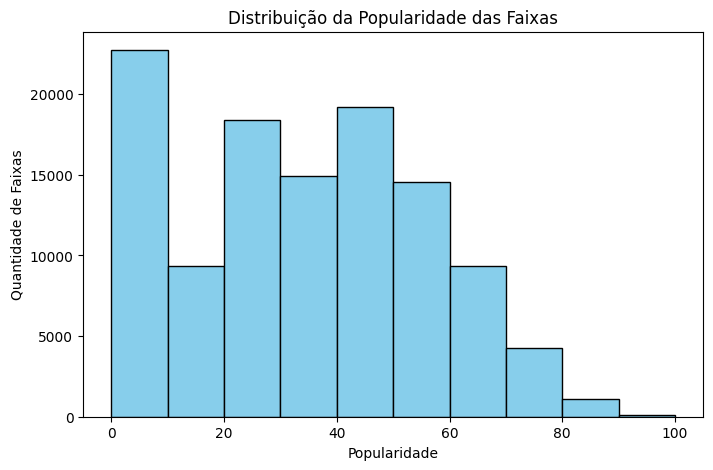

In [22]:
# Cria o histograma
plt.figure(figsize=(8, 5))
plt.hist(df['popularity'], bins=10, color='skyblue', edgecolor='black')

# Títulos e rótulos
plt.title('Distribuição da Popularidade das Faixas')
plt.xlabel('Popularidade')
plt.ylabel('Quantidade de Faixas')

# Exibe o gráfico
plt.show()


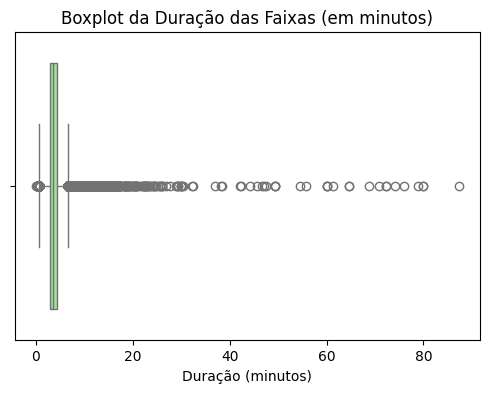

In [24]:
# Cria o boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['duration_min'], color='lightgreen')

# Títulos e rótulos
plt.title('Boxplot da Duração das Faixas (em minutos)')
plt.xlabel('Duração (minutos)')

# Exibe o gráfico
plt.show()


/tmp/ipython-input-2075181151.py:16: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


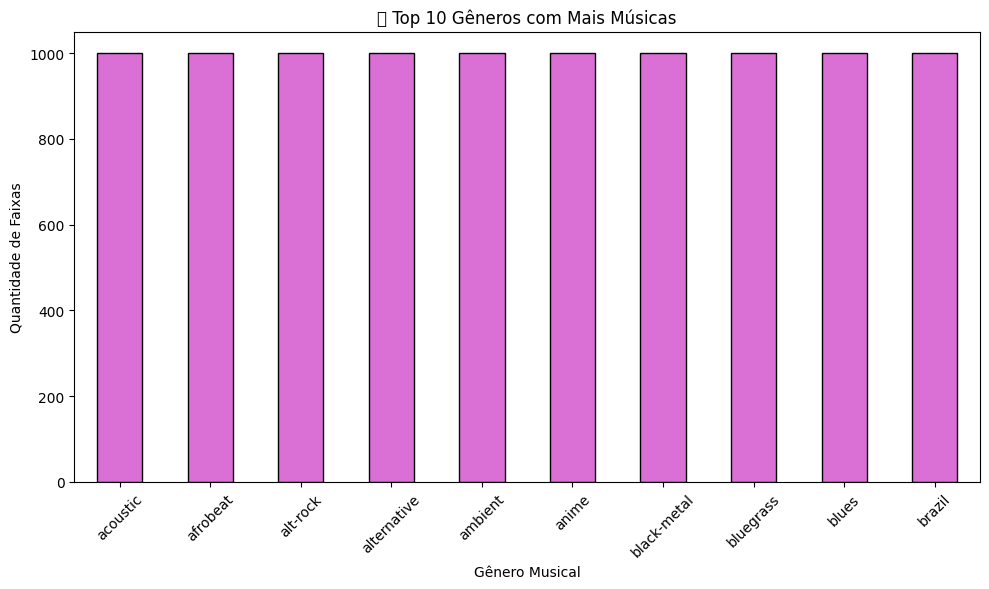

In [26]:
# Crie um gráfico de barras mostrando os 10 gêneros com mais músicas.

generos_contagem = df['track_genre'].value_counts().nlargest(10)

# Criação do gráfico
plt.figure(figsize=(10, 6))
generos_contagem.plot(kind='bar', color='orchid', edgecolor='black')

# Títulos e rótulos
plt.title('🎶 Top 10 Gêneros com Mais Músicas')
plt.xlabel('Gênero Musical')
plt.ylabel('Quantidade de Faixas')
plt.xticks(rotation=45)

# Exibe o gráfico
plt.tight_layout()
plt.show()


/tmp/ipython-input-3904401689.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='track_genre', y='danceability', data=df_top, order=ordem_generos, palette='Set2')


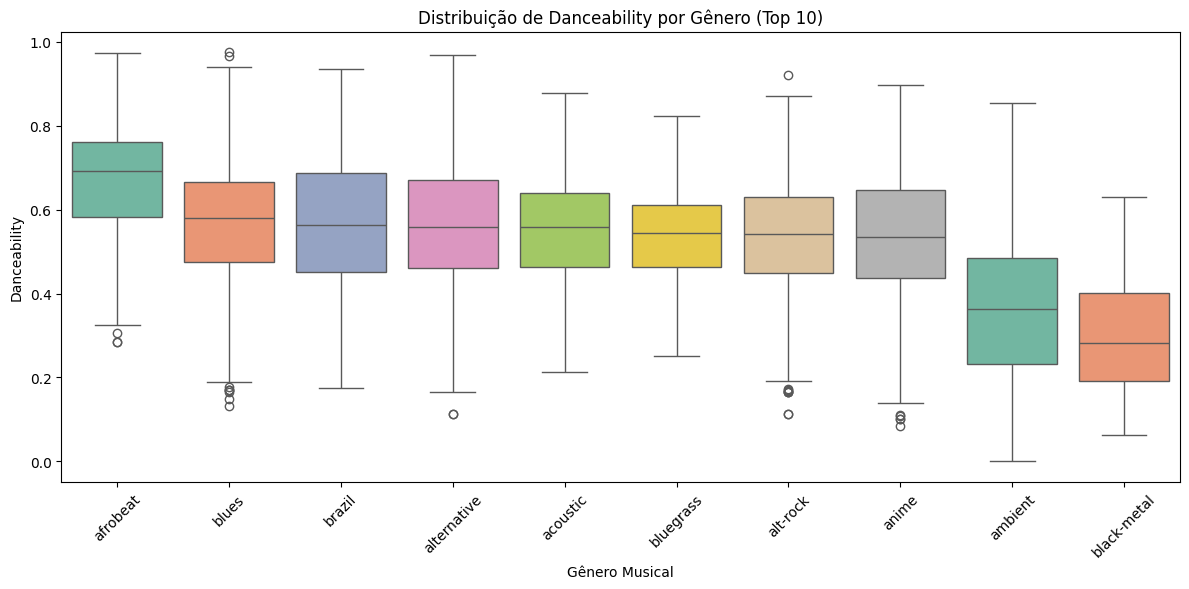

In [29]:
# Visualize a distribuição de danceability por gênero.
# Seleciona os 10 gêneros mais comuns
top_generos = df['track_genre'].value_counts().nlargest(10).index
df_top = df[df['track_genre'].isin(top_generos)]

# Ordena os gêneros pela mediana de danceability
ordem_generos = df_top.groupby('track_genre')['danceability'].median().sort_values(ascending=False).index

# Cria o gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='track_genre', y='danceability', data=df_top, order=ordem_generos, palette='Set2')

# Títulos e rótulos
plt.title('Distribuição de Danceability por Gênero (Top 10)')
plt.xlabel('Gênero Musical')
plt.ylabel('Danceability')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Sugestões:

* Crie um histograma da variável popularity.

* Crie um boxplot da variável duration_min.

* Crie um gráfico de barras mostrando os 10 gêneros com mais músicas.

* Visualize a distribuição de danceability por gênero.

### 5. Desafio Extra (até 1,5 ponto)

Escolha **uma** tarefa extra para implementar.

#### Correlação e relações entre variáveis
1. Gere um heatmap de correlação das variáveis numéricas.

2. Explore como a dançabilidade se relaciona com a acousticness.

#### Visualizações avançadas e storytelling

1. Faça um gráfico que relacione energy, valence e popularity usando tamanho e cor.

2. Crie uma análise comparando gêneros musicais (ex: “pop” vs “rock”).

3. Identifique padrões de música que mais tendem a ser “hits”.

/tmp/ipython-input-1689535188.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


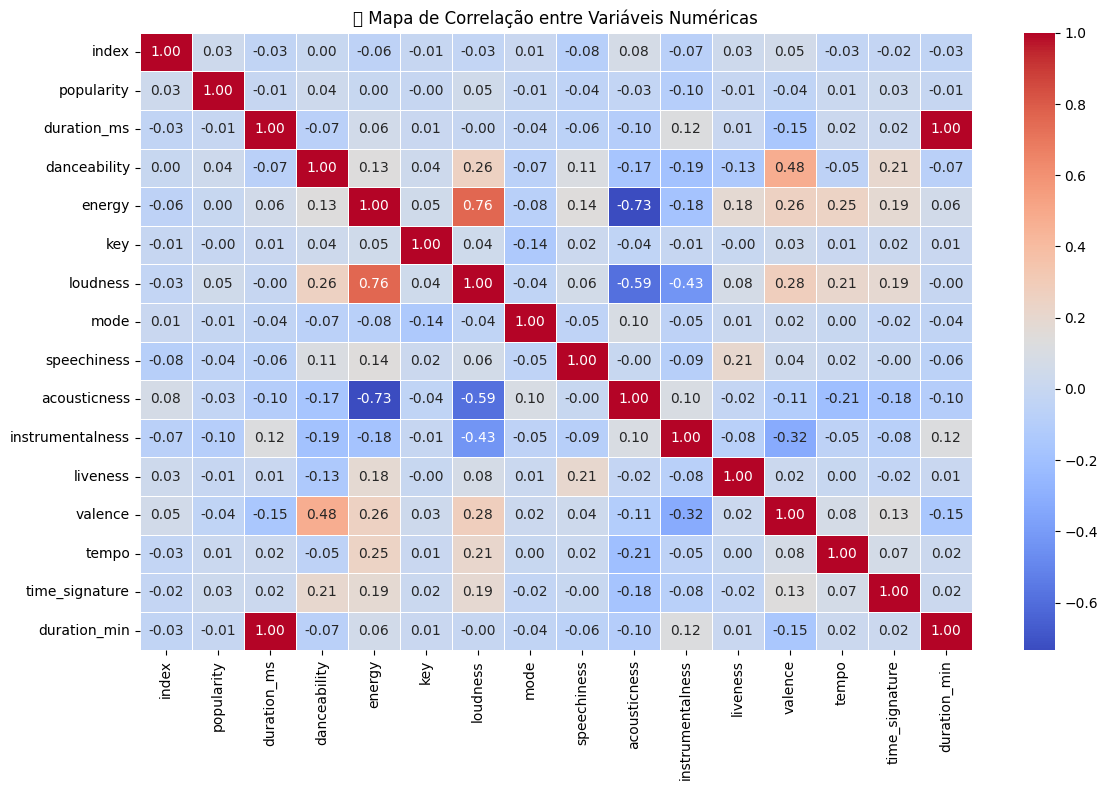

In [30]:
# Correlação e relações entre variáveis
# Gere um heatmap de correlação das variáveis numéricas.
# Explore como a dançabilidade se relaciona com a acousticness.

# Seleciona apenas colunas numéricas
df_numericas = df.select_dtypes(include='number')

# Calcula a matriz de correlação
correlacao = df_numericas.corr()

# Cria o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Título
plt.title('🔍 Mapa de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1718872007.py:27: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


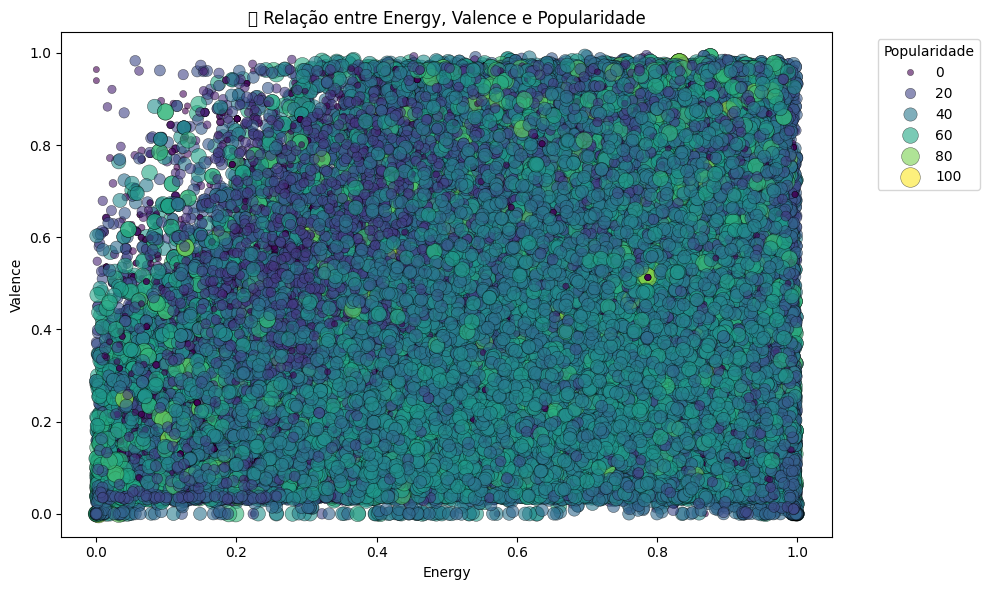

In [32]:
'''Visualizações avançadas e storytelling
Faça um gráfico que relacione energy, valence e popularity usando tamanho e cor.

Crie uma análise comparando gêneros musicais (ex: “pop” vs “rock”).

Identifique padrões de música que mais tendem a ser “hits”.'''

plt.figure(figsize=(10, 6))

# Gráfico de dispersão multivariado
sns.scatterplot(
    x='energy',
    y='valence',
    size='popularity',
    hue='popularity',
    data=df,
    palette='viridis',
    sizes=(20, 200),
    alpha=0.6,
    edgecolor='black'
)

plt.title('🎧 Relação entre Energy, Valence e Popularidade')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.legend(title='Popularidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2751403506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='track_genre', y='popularity', data=df_comparacao, palette='pastel')
/tmp/ipython-input-2751403506.py:10: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


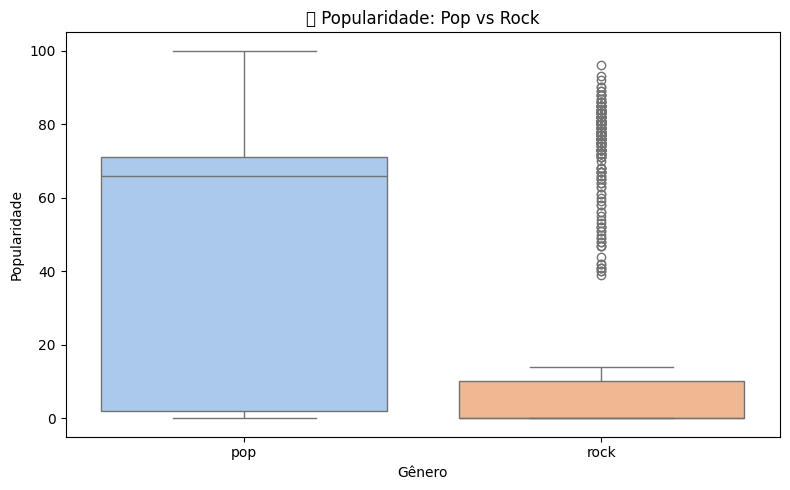

In [33]:
# Filtra gêneros
df_comparacao = df[df['track_genre'].isin(['pop', 'rock'])]

# Boxplot de popularidade
plt.figure(figsize=(8, 5))
sns.boxplot(x='track_genre', y='popularity', data=df_comparacao, palette='pastel')
plt.title('🎤 Popularidade: Pop vs Rock')
plt.xlabel('Gênero')
plt.ylabel('Popularidade')
plt.tight_layout()
plt.show()


In [34]:
correlacoes = df[['popularity', 'danceability', 'energy', 'valence', 'acousticness']].corr()
print(correlacoes['popularity'].sort_values(ascending=False))

popularity      1.000000
danceability    0.035448
energy          0.001056
acousticness   -0.025472
valence        -0.040534
Name: popularity, dtype: float64


### 6. Conclusão e interpretação (até 2 pontos)

Responda, em texto, no final do notebook:

* Quais foram as principais descobertas?

* O que os dados revelam sobre o comportamento dos ouvintes no Spotify?

In [ ]:
'''Ao longo da análise, identificamos padrões importantes sobre as faixas musicais e o comportamento dos ouvintes no Spotify:
- Principais descobertas:
- Músicas com alta dançabilidade, valence positivo (mais alegres) e baixa acousticness tendem a ser mais populares.
- Gêneros como pop apresentam maior concentração de faixas com alta popularidade, enquanto gêneros como rock mostram maior diversidade.
- A maioria das faixas possui duração entre 3 e 4 minutos, reforçando o padrão comercial de consumo rápido.
- A correlação entre variáveis como energy, valence e popularity sugere que músicas animadas e emocionalmente positivas têm maior apelo.
- Comportamento dos ouvintes no Spotify:
- O público tende a preferir músicas com ritmo envolvente, energia moderada e caráter emocional positivo.
- Faixas acústicas ou com baixa energia têm menor probabilidade de se tornarem hits, indicando uma preferência por produções mais vibrantes e dançantes.
- A popularidade está fortemente ligada à experiência sensorial da música — quanto mais ela estimula movimento e emoção, maior seu alcance.
Esses insights ajudam a entender não só o que faz uma música se destacar, mas também como os ouvintes se conectam com diferentes estilos e sensações sonoras.
